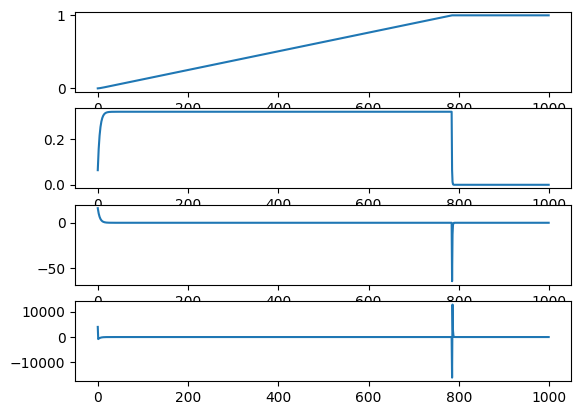

In [9]:
import numpy
import matplotlib.pyplot as plt


class Servo:
    def __init__(self, k = 0.3, dt = 0.01):
        self.x0     = 0.0
        self.x1     = 0.0
        self.x2     = 0.0
        self.x3     = 0.0

        self.k      = k
        self.dt     = dt

    def set_position(self, xr):
        self.x3  = self.x2
        self.x2  = self.x1
        self.x1  = self.x0

        self.x0  = (1.0 - self.k)*self.x0 + self.k*xr

        return self.x0

    def get_position(self):
        return self.x0
    
    def get_velocity(self):
        return (self.x0 - self.x1)/self.dt
    
    def get_accleration(self):
        return (self.x0 - 2.0*self.x1 + self.x2)/(self.dt**2)
    
    def get_jerk(self):
        return (self.x0 - 3.0*self.x1 + 3.0*self.x2 - self.x3)/(self.dt**3)
    
    def get_dt(self):
        return self.dt


def motion_filter(servo, xr):
   
    x = servo.get_position()
    v = servo.get_velocity()
    
    dt = servo.get_dt()

    max_vel = 10.0
    max_acc = 20.0


    dx = xr - x
    direction = numpy.sign(dx)
    
    # Acceleration limit
    dv_max      = max_acc * dt
    v_target    = direction * max_vel
    dv          = numpy.clip(v_target - v, -dv_max, dv_max)
    v_new       = v + dv

    # Don't overshoot target
    if abs(dx) < abs(v_new * dt):
        v_new = dx / dt

    x_new = x + v_new * dt

    servo.set_position(x_new)



servo = Servo(0.8, 1.0/250.0)


x = []
v = []
a = []
j = []

for n in range(1000):

    motion_filter(servo, 1.0)

    x.append(servo.get_position())
    v.append(servo.get_velocity())
    a.append(servo.get_accleration())
    j.append(servo.get_jerk())


x = numpy.array(x)
v = numpy.array(v)
a = numpy.array(a)
j = numpy.array(j)


fig, axs = plt.subplots(4)
axs[0].plot(x, label="position")
axs[1].plot(v, label="velocity")
axs[2].plot(a, label="acceleration")
axs[3].plot(j, label="jerk")

#fig.show()
plt.show()